In [1]:
import sys
sys.path.append('../src')

import numpy as np

from data_loading import BavarianBuildingDataset, generator
from visualize import Visualizer

from backbone import Backbone
from rpn import RPN
from roi_align import ROIAlignLayer
from classifier import Classifier
from mask_head import MaskHead
from utils import Config

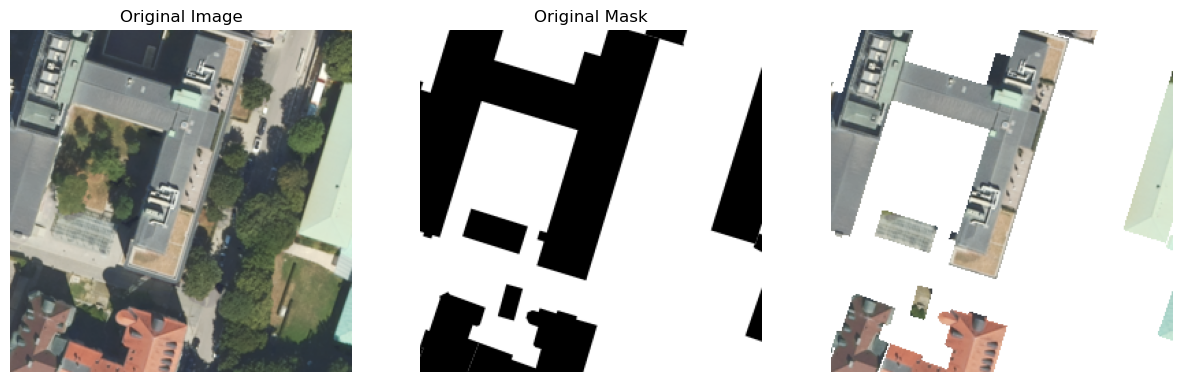

In [2]:
config = Config()

dataset = BavarianBuildingDataset(image_dir='../data/bbd250-image', mask_dir='../data/bbd250-umring')
gen = generator(dataset, dataset.train_test_val_split()[0], batch_size=config.batch_size)
images, masks = next(gen)

testing_image = np.expand_dims(images[0], axis=0)
testing_mask = np.expand_dims(masks[0], axis=0)

Visualizer.display_sample(testing_image[0], testing_mask[0])

1/1 [==============================] - 1s 1s/step


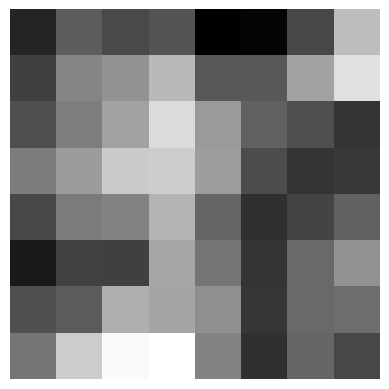

In [3]:
backbone = Backbone(config)

feature_maps = backbone.model.predict(testing_image)
Visualizer.display_avg_feature_map(feature_maps)

1/1 [==============================] - 0s 301ms/step


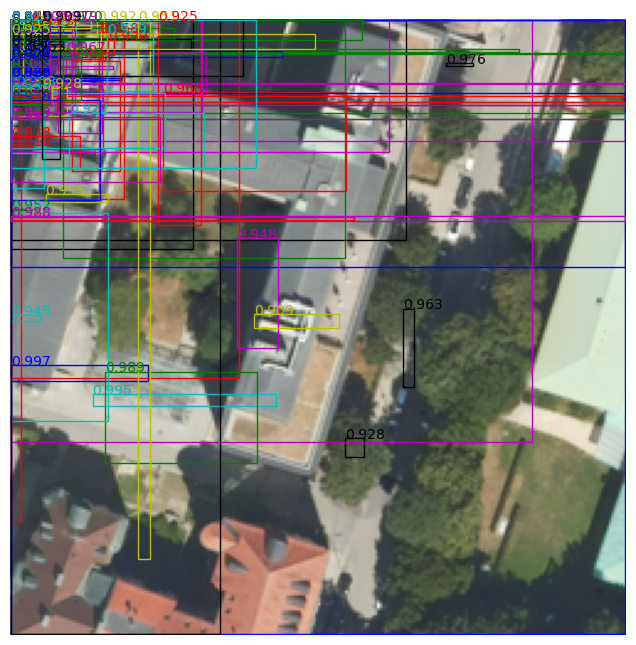

In [4]:
rpn = RPN(config, backbone)

roi_boxes, roi_scores = rpn.model.predict(feature_maps)
Visualizer.display_rois(testing_image[0], roi_boxes, roi_scores)